# Fully-Connected Neural Nets

In [ ]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    fixed_x = x.reshape(x.shape[0],-1)
    out = fixed_x.dot(w)+b

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache

**Forward Propagation**

>$ out = wx+b $  

In [ ]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dx = dout.dot(w.T)
    dx = dx.reshape(x.shape)
    transform_x = x.reshape(x.shape[0],-1)
    dw = transform_x.T.dot(dout)
    db = np.sum(dout, axis=0)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

**Back Propagation**

>$ out = wx+b $  
>
>$ \frac{dout}{dx} = w 　\blacktriangleright 　 \frac{dloss}{dx} = \frac{dloss}{dout} ⋅ \frac{dout}{dx} = \frac{dloss}{dout} ⋅ w $   
>
>$ \frac{dout}{dw} = x 　\blacktriangleright 　 \frac{dloss}{dw} = \frac{dloss}{dout} ⋅ \frac{dout}{dw} = \frac{dloss}{dout} ⋅ x $   
>
>$ \frac{dout}{db} = 1　\blacktriangleright 　 \frac{dloss}{db} = \frac{dloss}{dout} ⋅ \frac{dout}{db} = \frac{dloss}{dout} $ 

In [ ]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    out = np.maximum(0,x)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache

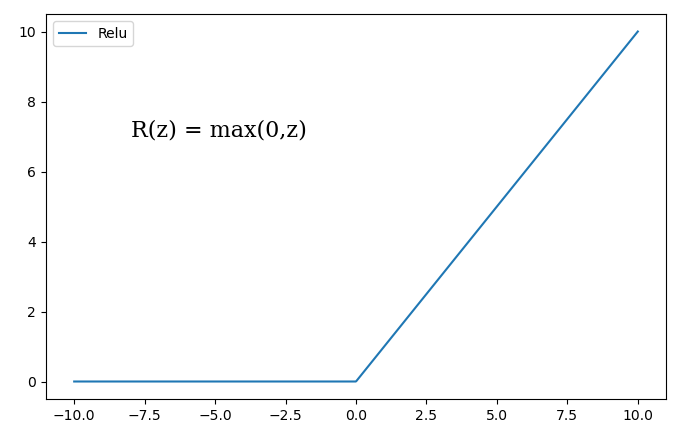

**ReLU Forward Propagation**

>$ out =
\begin{cases}
0, & x < 0 \\
x, & x \ge 0
\end{cases} $

In [ ]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    mask = np.where(x>0,1,0)
    dx = dout*mask

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx

**ReLU Back Propagation**

>$ out =
\begin{cases}
0, & x < 0 \\
x, & x \ge 0
\end{cases} $  
>
>$ \frac{dout}{dx} =
\begin{cases}
0, & x < 0 \\
1, & x \ge 0
\end{cases} $  
> 　$\blacktriangledown$  
>$\frac{dloss}{dx} = \frac{dloss}{dout}⋅\frac{dout}{dx}$  
>
>$ \frac{dloss}{dx} =
\begin{cases}
0, & x < 0 \\
\frac{dloss}{dout}, & x \ge 0
\end{cases} $ 

In [ ]:
def svm_loss(x, y):
    """
    Computes the loss and gradient using for multiclass SVM classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None
    ###########################################################################
    # TODO: Implement loss and gradient for multiclass SVM classification.    #
    # This will be similar to the svm loss vectorized implementation in       #
    # cs231n/classifiers/linear_svm.py.                                       #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N = x.shape[0]
    correct_class_score = x[range(N), y].reshape(-1, 1)
    margin = np.maximum(0,x - correct_class_score + 1)
    margin[np.arange(N), y ] =0
    loss = np.sum(margin) / N

    dx = np.zeros_like(x)
    dx[margin>0] = 1
    num_pos = np.sum(margin>0,axis=1)
    dx[range(N),y] -= num_pos
    dx /= N

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx

**SVM Loss** 

>$Loss=\frac{1}{N}\sum_{i}L_{i}(f(x_{i},w),y_{i})$   
>$ L_{i} = \sum_{j\ne y_{i}}max(0,w^T_{j}x_{i}-w^T_{y_i}x_{i}+1) $  

**SVM Back Propagation**
>$ margin = w^T_{j}x_{i}-w^T_{y_i}x_{i}+1 $  
> 
>$ \frac{dL_{i}}{dw^T_{j}x_{i}} = \begin{cases}
0, & margin \le 0 \\
1, & margin > 0
\end{cases} $  
>
>$ \frac{dL_{i}}{dw^T_{y_{i}}x_{i}} = \begin{cases}
0, & margin \le 0 \\
-1, & margin > 0
\end{cases} $  
>

In [ ]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None
    ###########################################################################
    # TODO: Implement the loss and gradient for softmax classification. This  #
    # will be similar to the softmax loss vectorized implementation in        #
    # cs231n/classifiers/softmax.py.                                          #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N = x.shape[0]

    exp = np.exp(x)
    correct_class = exp[range(N),y]
    exp_sum = np.sum(exp,axis=1)

    softmax = correct_class/exp_sum
    loss = np.sum(-np.log(softmax))/N
    
    dx = exp/exp_sum.reshape(-1,1)
    dx[range(N),y] -= 1

    dx /= N

**Softmax Loss (cross-entropy)**

>$Loss=\frac{1}{N}\sum_{i}L_{i}(f(x_{i},w),y_{i})$  
>
>$L_{i} = -log(\frac{e^{f_{y_{i}}}}{\sum_{j}e^{f_{j}}})$  
>
>$L_{i} = - w^T_{y_i}x_{i} + log∑_{j}e^{w^T_{j}x_{i}} $

**Softmax Back Propagation**

>$\frac{dL_{i}}{dw^T_{y_{i}}x_{i}} = -1$  
$ \frac{dL_{i}}{dw^T_{j}x_{i}}  = \frac{e^{w^T_{j}x_{i}}}{∑_{j}e^{w^T_{j}x_{i}}}$